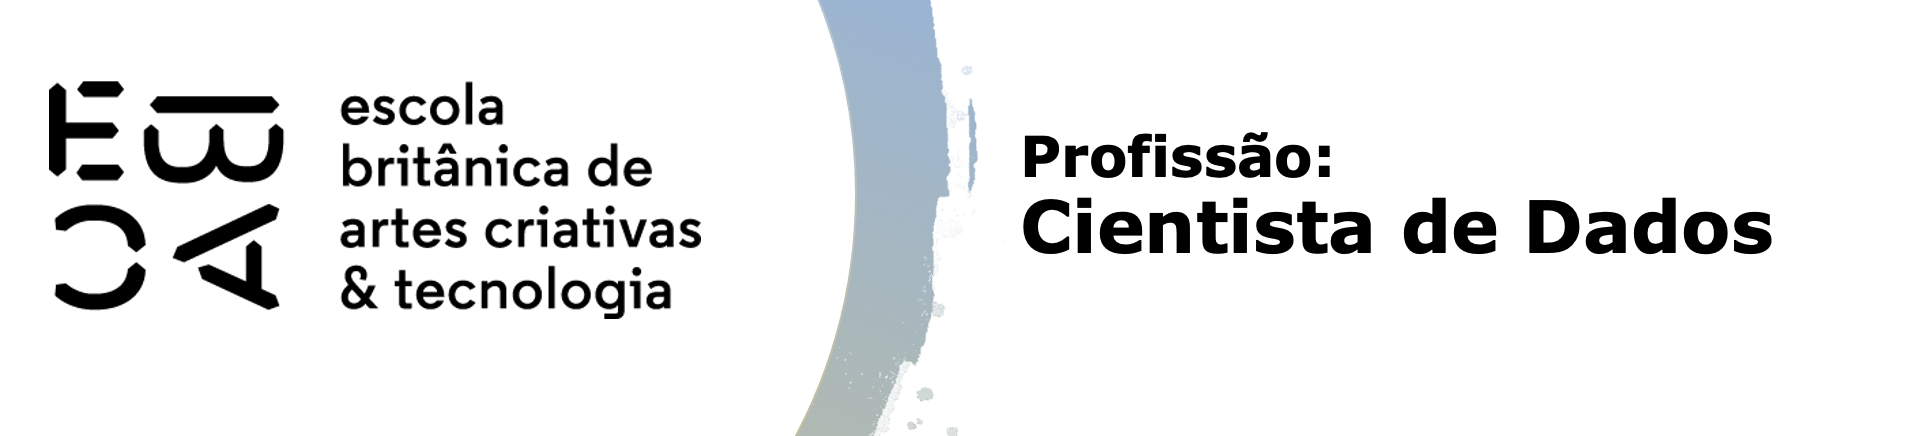

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import plot_tree
import time
import warnings
warnings.filterwarnings('ignore')

id_random = 846846

In [2]:
# Utilização de bases TRAIN e TEST
X_train = pd.read_csv('./output/X_train.csv')
y_train = X_train['subject']
X_train.drop(['Unnamed: 0','subject'], inplace=True, axis=1) 

X_test = pd.read_csv('./output/X_test.csv')
y_test = X_test['subject']
X_test.drop(['Unnamed: 0','subject'], inplace=True, axis=1) 


In [3]:
# Unificação das bases e definição de novas Train e Test

# treino = pd.read_csv('./output/X_train.csv')
# teste = pd.read_csv('./output/X_test.csv')
# frames = [treino, teste]
# base = pd.concat(frames)

# y = base['subject']
# X = base
# X.drop(['Unnamed: 0','subject'], inplace=True, axis=1) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2861, random_state=id_random)

# tot_base=len(X_train)+len(X_test)
# print('Conferência das bases:')
# print(f'Base treino...: {len(X_train)} linhas = {round((len(X_train) /tot_base*100),2)}%')
# print(f'Base teste....: {len(X_test)} linhas = {round((len(X_test) /tot_base*100),2)}%')
# print(f'Total.........:{tot_base}')

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamos acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [4]:
%%time

var=['tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-sma()']
X_train=X_train[var]
X_test=X_test[var]

caminho = DecisionTreeClassifier(random_state=id_random,min_samples_leaf=20).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
print(f'Variáveis: {var}')
print(f'ccp_alphas gerados: {ccp_alphas.size}')

Variáveis: ['tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-sma()']
ccp_alphas gerados: 219
Wall time: 30.9 ms


In [5]:
X_train

,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-sma()
0,-0.161265,0.124660,-0.375426
1,-0.161343,0.122586,-0.383430
2,-0.163711,0.094566,-0.401602
3,-0.163711,0.093425,-0.400278
4,-0.166786,0.091682,-0.400477
...,...,...,...
7347,-0.214233,-0.016391,-0.405132
7348,-0.231477,-0.016391,-0.358934
7349,-0.249134,0.024684,-0.377025
7350,-0.244267,0.024684,-0.440050


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [6]:
%%time
clf = DecisionTreeClassifier(random_state=id_random)
grid_parametros = {'ccp_alpha':ccp_alphas}
grid = GridSearchCV(estimator = clf, 
                    param_grid=grid_parametros,
                    cv=10, 
                    verbose=0)
grid.fit(X_train, y_train) 

Wall time: 1min 5s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=846846),
             param_grid={'ccp_alpha': array([0.00000000e+00, 7.41913147e-06, 8.82920031e-06, 9.41658994e-06,
       9.71552930e-06, 9.87523663e-06, 2.21472281e-05, 2.25875066e-05,
       2.62714231e-05, 4.21165802e-05, 4.43302202e-05, 4.76060936e-05,
       6.12078346e-05, 7.35307795e-05, 7.66643585e-05, 8.39853533e-05,
       1.1561...
       3.57215144e-03, 3.59050339e-03, 3.61653041e-03, 3.69529254e-03,
       3.80318677e-03, 3.81668994e-03, 4.10230082e-03, 4.30097804e-03,
       4.31425370e-03, 4.50348534e-03, 4.60237101e-03, 4.66854884e-03,
       5.05957957e-03, 5.31323417e-03, 5.51938062e-03, 5.87982339e-03,
       5.89715484e-03, 6.48221594e-03, 7.41266117e-03, 7.50232448e-03,
       8.16342804e-03, 8.19184103e-03, 8.88226812e-03, 8.97031787e-03,
       1.16616810e-02, 1.28583939e-02, 1.83348752e-02])})

In [7]:
pd.DataFrame(grid.cv_results_).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      219 non-null    float64
 1   std_fit_time       219 non-null    float64
 2   mean_score_time    219 non-null    float64
 3   std_score_time     219 non-null    float64
 4   param_ccp_alpha    219 non-null    object 
 5   params             219 non-null    object 
 6   split0_test_score  219 non-null    float64
 7   split1_test_score  219 non-null    float64
 8   split2_test_score  219 non-null    float64
 9   split3_test_score  219 non-null    float64
 10  split4_test_score  219 non-null    float64
 11  split5_test_score  219 non-null    float64
 12  split6_test_score  219 non-null    float64
 13  split7_test_score  219 non-null    float64
 14  split8_test_score  219 non-null    float64
 15  split9_test_score  219 non-null    float64
 16  mean_test_score    219 non

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [8]:
resultados = pd.DataFrame(grid.cv_results_)

melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=id_random, ccp_alpha=melhor_ccp).fit(X_train, y_train)
clf.score(X_train, y_train)

0.940968443960827

In [9]:
clf.score(X_test, y_test)

0.0

In [10]:
print(f'{resultados.columns[18]} = {resultados.iloc[grid.best_index_,18]}')
print(f'{resultados.columns[4]} = {resultados.iloc[grid.best_index_,4]}')

resultados[(resultados['rank_test_score']==1)].T


rank_test_score = 1
param_ccp_alpha = 0.00018778374327884685


,23
mean_fit_time,0.027505
std_fit_time,0.001079
mean_score_time,0.001496
std_score_time,0.000499
param_ccp_alpha,0.000188
params,{'ccp_alpha': 0.00018778374327884685}
split0_test_score,0.195652
split1_test_score,0.298913
split2_test_score,0.420408
split3_test_score,0.432653


Acurácia: 0.00



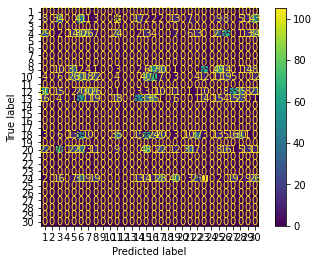

In [11]:
acuracia_teste = clf.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}\n')
plot_confusion_matrix(clf, X_test, y_test);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Faça uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [12]:
treino = pd.read_csv('./output/X_train.csv')
teste = pd.read_csv('./output/X_test.csv')
frames = [treino, teste]
base = pd.concat(frames)

y = base['subject']
X = base
X.drop(['Unnamed: 0','subject'], inplace=True, axis=1) 

# Identificando a classe de maior erro
modelo = sm.OLS(y,X).fit()
LR = modelo.summary().tables[1]
results_as_html = LR.as_html()
lr=pd.read_html(results_as_html, header=0, index_col=0)[0]
err_var=lr[(lr['std err']==lr['std err'].max())].index.tolist()
lr[(lr['std err']==lr['std err'].max())]

,coef,std err,t,P>|t|,[0.025,0.975]
fBodyAccJerk-energy()-Z,31130000.0,22000000.0,1.416,0.157,-12000000.0,74200000.0


In [13]:
X_train = pd.read_csv('./output/X_train.csv')
y_train = X_train['subject']
X_train.drop(['Unnamed: 0','subject'], inplace=True, axis=1) 

X_test = pd.read_csv('./output/X_test.csv')
y_test = X_test['subject']
X_test.drop(['Unnamed: 0','subject'], inplace=True, axis=1) 

In [14]:
# y = y_train.copy()
x = X_train[err_var].copy()
x.rename(columns={'fBodyAccJerk-energy()-Z': 'fBodyAccJerk_energy_Z'},inplace=True)
# print(f'Base y = {y.size}')
print(f'Base x = {x.size}')

Base x = 7352


In [15]:
x['fBodyAccJerk_energy_Z'].describe()

count    7352.000000
mean       -0.927514
std         0.127573
min        -1.000000
25%        -0.999793
50%        -0.998557
75%        -0.891120
max         1.000000
Name: fBodyAccJerk_energy_Z, dtype: float64

In [16]:
ÿ=pd.qcut(x.fBodyAccJerk_energy_Z, q=2,labels=[0,1])#.value_counts()
x=X_train
x.drop(err_var, inplace=True, axis=1) 


clf = DecisionTreeClassifier(random_state=id_random,min_samples_leaf=20,max_depth=4).fit(x, ÿ)

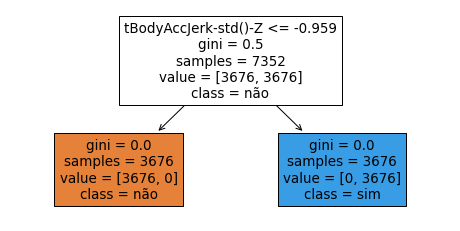

In [20]:
plt.figure(figsize=(8, 4))
plot_tree(clf,
          filled=True,
          class_names=['não', 'sim'],
          feature_names=x.columns);

### Escolhendo as três melhores variáveis

In [21]:
%%time
caminho = DecisionTreeClassifier(random_state=id_random, min_samples_leaf=20,max_depth=4).cost_complexity_pruning_path(x, ÿ)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

positivos = [num for num in list(ccp_alphas) if num >= 0] 
pos_count = len(positivos) 
  
print("ccp_alphas positivos: ", pos_count) 
print("ccp_alphas negativos ", len(list(ccp_alphas)) - pos_count) 

ccp_alphas positivos:  2
ccp_alphas negativos  0
Wall time: 387 ms


In [23]:
clf = DecisionTreeClassifier(random_state=id_random,min_samples_leaf=20, max_depth=4).fit(x, ÿ)
feature_importances = clf.feature_importances_


sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]


variaveis_importantes = pd.DataFrame(index=sorted_feature_names)
variaveis_importantes['sorted_indices'] = sorted_indices
variaveis_importantes['sorted_importances'] = sorted_importances
best_var=variaveis_importantes.sort_values(by='sorted_importances',ascending=False)
print(f'MELHORES VARIÁVEIS ENCONTRADAS \n{best_var[0:3].index.tolist()}')


MELHORES VARIÁVEIS ENCONTRADAS 
['tBodyAccJerk-std()-Z', 'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-min()']


In [24]:
var=best_var[0:3].index.tolist()
x_train = x[var]

caminho = DecisionTreeClassifier(random_state=id_random,max_depth = 4).cost_complexity_pruning_path(x_train, ÿ)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
print(f'Variáveis: {var}')
print(f'ccp_alphas gerados: {ccp_alphas.size}')

Variáveis: ['tBodyAccJerk-std()-Z', 'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-min()']
ccp_alphas gerados: 2


In [25]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=id_random, ccp_alpha=ccp_alpha).fit(x_train, ÿ)
    clfs.append(clf)

In [26]:
train_scores = [clf.score(x_train, ÿ) for clf in clfs]

ind_melhor_arvore = len(train_scores) - train_scores[::-1].index(max(train_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore = {train_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore = 100.00


DecisionTreeClassifier(random_state=846846)